<a href="https://colab.research.google.com/github/HaydeePeruyero/CAMDA2023/blob/main/resultados/Camda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 1

In [1]:
!pip install contextily
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 3.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 57.2 MB/s eta 0:00:00


In [2]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
os.chdir('/content/drive/MyDrive/CAMDA')
!pwd

/content/drive/MyDrive/CAMDA


In [4]:
import contextily as ctx
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
otus = pd.read_csv("relative_otu2017.csv", index_col="Sample")
otus.head()

,ID_city,City,Latitude,Longitude,Climate,9606,5761,85009,31957,1912216,...,2108205,1922682,1165160,2845433,2956691,2845502,1513254,2955442,40056,1922952
Sample,,,,,,,,,,,,,,,,,,,,,
CAMDA23_MetaSUB_gCSD17_BAL_10,BAL,Baltimore,39.25,-76.75,Cfa,54.900422,0.000889,0.019997,0.013078,0.129126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAMDA23_MetaSUB_gCSD17_BAL_11,BAL,Baltimore,39.25,-76.75,Cfa,44.046593,0.005151,0.010982,0.007386,0.115559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAMDA23_MetaSUB_gCSD17_BAL_12,BAL,Baltimore,39.25,-76.75,Cfa,54.243701,0.000316,0.012866,0.007804,0.080394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAMDA23_MetaSUB_gCSD17_BAL_14,BAL,Baltimore,39.25,-76.75,Cfa,30.948685,0.000452,0.019580,0.011748,0.088789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAMDA23_MetaSUB_gCSD17_BAL_1,BAL,Baltimore,39.25,-76.75,Cfa,55.396966,0.000888,0.011741,0.009401,0.157997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


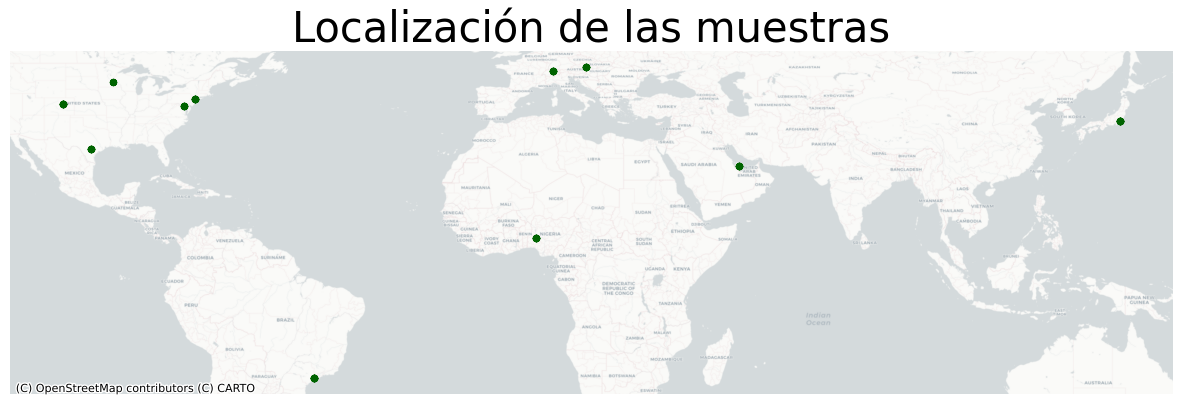

In [6]:
otus_gdf = gpd.GeoDataFrame(otus.copy(), geometry=gpd.points_from_xy(otus['Longitude'], otus['Latitude']), crs='EPSG:4326')

fig, ax = plt.subplots(1, figsize=(15, 15))
otus_gdf.plot(marker='.', c='darkgreen', ax=ax, markersize=70, zorder=1)
plt.title("Localización de las muestras",fontsize=30)
plt.axis("off")

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='EPSG:4326')

In [7]:
cont_names = list(otus.drop(["ID_city","City","Climate","Latitude", "Longitude"], axis=1).columns)
y_names = ["Climate"]
train_df = otus[cont_names+y_names]
train_df

,9606,5761,85009,31957,1912216,1747,33011,33010,2559073,3016342,...,1922682,1165160,2845433,2956691,2845502,1513254,2955442,40056,1922952,Climate
Sample,,,,,,,,,,,,,,,,,,,,,
CAMDA23_MetaSUB_gCSD17_BAL_10,54.900422,0.000889,0.019997,0.013078,0.129126,6.101063,0.333545,0.036821,0.033710,0.004190,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfa
CAMDA23_MetaSUB_gCSD17_BAL_11,44.046593,0.005151,0.010982,0.007386,0.115559,6.609973,0.345704,0.035377,0.035669,0.004179,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfa
CAMDA23_MetaSUB_gCSD17_BAL_12,54.243701,0.000316,0.012866,0.007804,0.080394,4.291298,0.248986,0.028579,0.023869,0.002179,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfa
CAMDA23_MetaSUB_gCSD17_BAL_14,30.948685,0.000452,0.019580,0.011748,0.088789,4.099501,0.267120,0.033512,0.037730,0.004368,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfa
CAMDA23_MetaSUB_gCSD17_BAL_1,55.396966,0.000888,0.011741,0.009401,0.157997,7.604532,0.518535,0.060116,0.055073,0.006173,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAMDA23_MetaSUB_gCSD17_ZRH_5,12.068412,0.000403,0.074334,0.063998,0.005804,0.168872,0.012166,0.016263,0.003135,0.004966,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
CAMDA23_MetaSUB_gCSD17_ZRH_6,10.081277,0.000654,0.088514,0.049163,0.092266,4.922517,0.066446,0.025132,0.013427,0.004717,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
CAMDA23_MetaSUB_gCSD17_ZRH_7,13.673297,0.000366,0.033868,0.021360,0.064518,3.443872,0.068760,0.022237,0.011704,0.002926,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb


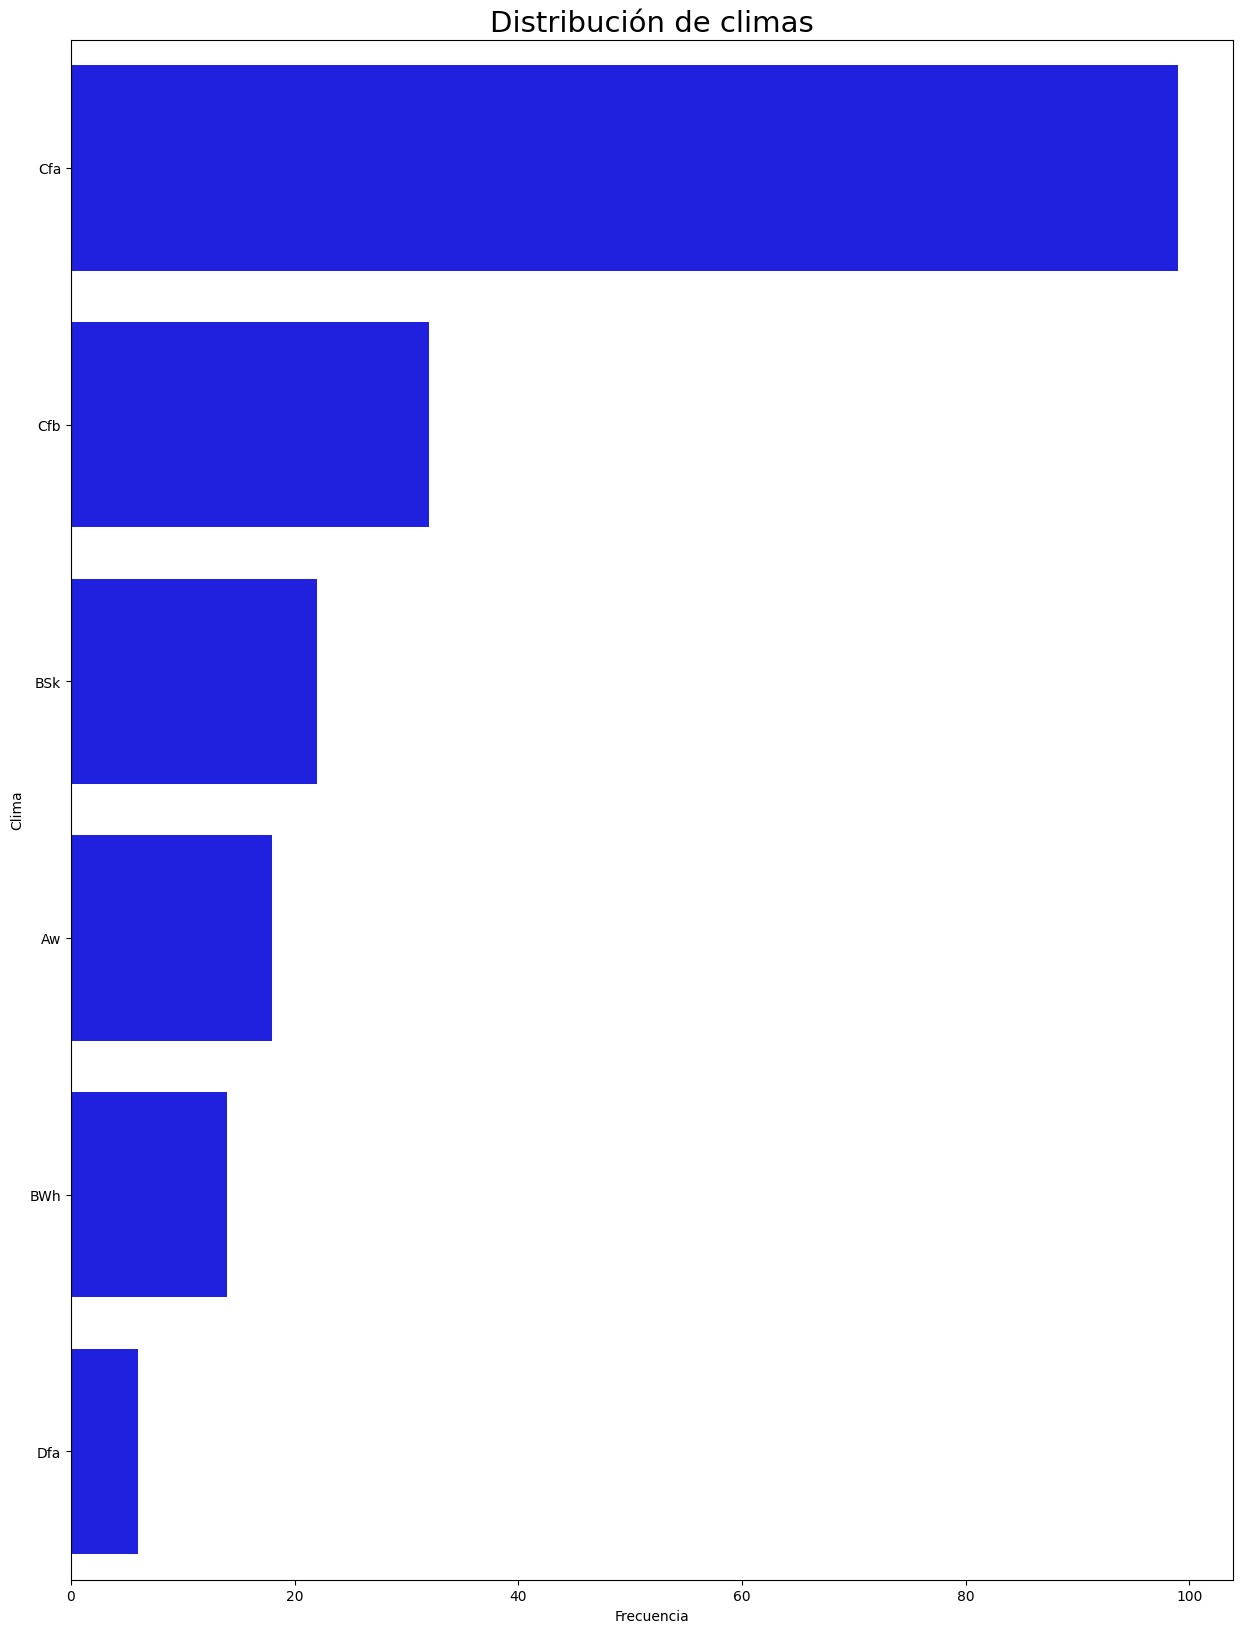

In [8]:
fig, ax = plt.subplots(1,1 ,figsize=(15, 20))
sns.countplot(data=train_df, y="Climate", order=train_df.Climate.value_counts().index, color="blue")
plt.xlabel("Frecuencia")
plt.ylabel("Clima")
plt.title("Distribución de climas", fontsize=21)
plt.show()

In [9]:
y = np.array(train_df[y_names]).ravel()
X = np.array(train_df.drop(y_names,axis=1)).astype('float')

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

X_std = StandardScaler().fit_transform(X)
ncomp=3
otus_pca=PCA(ncomp)
otus_pca.fit_transform(X_std) 
proj = pd.DataFrame(otus_pca.transform(X_std),columns = ['pc1','pc2','pc3'])
pca_proj = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'clima': y})

# Grafica interactiva
fig = px.scatter(pca_proj, x='pc1', y='pc2', hover_data=['clima'], color = 'clima')
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig.show()

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50)
#X_tsne = tsne.fit_transform(train_img)
#tsne_dataset = pd.DataFrame({'pc1': X_tsne[:, 0], 'pc2': X_tsne[:, 1], 'digit': y_train})
X_tsne = tsne.fit_transform(X_std)

tsne_dataset = pd.DataFrame({'pc1': X_tsne[:, 0], 'pc2': X_tsne[:, 1], 'clima': y})

In [12]:
# Grafica interactiva
fig = px.scatter(tsne_dataset, x='pc1', y='pc2', hover_data=['clima'], color = 'clima')
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()


# Notebook 2

In [13]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

otus = pd.read_csv("relative_otu2017.csv", index_col="Sample")

cont_names = list(otus.drop(["ID_city","City","Climate","Latitude", "Longitude"], axis=1).columns)
y_names = ["Climate"]
otus_df = otus[cont_names+y_names]
otus_df

,9606,5761,85009,31957,1912216,1747,33011,33010,2559073,3016342,...,1922682,1165160,2845433,2956691,2845502,1513254,2955442,40056,1922952,Climate
Sample,,,,,,,,,,,,,,,,,,,,,
CAMDA23_MetaSUB_gCSD17_BAL_10,54.900422,0.000889,0.019997,0.013078,0.129126,6.101063,0.333545,0.036821,0.033710,0.004190,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfa
CAMDA23_MetaSUB_gCSD17_BAL_11,44.046593,0.005151,0.010982,0.007386,0.115559,6.609973,0.345704,0.035377,0.035669,0.004179,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfa
CAMDA23_MetaSUB_gCSD17_BAL_12,54.243701,0.000316,0.012866,0.007804,0.080394,4.291298,0.248986,0.028579,0.023869,0.002179,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfa
CAMDA23_MetaSUB_gCSD17_BAL_14,30.948685,0.000452,0.019580,0.011748,0.088789,4.099501,0.267120,0.033512,0.037730,0.004368,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfa
CAMDA23_MetaSUB_gCSD17_BAL_1,55.396966,0.000888,0.011741,0.009401,0.157997,7.604532,0.518535,0.060116,0.055073,0.006173,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAMDA23_MetaSUB_gCSD17_ZRH_5,12.068412,0.000403,0.074334,0.063998,0.005804,0.168872,0.012166,0.016263,0.003135,0.004966,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
CAMDA23_MetaSUB_gCSD17_ZRH_6,10.081277,0.000654,0.088514,0.049163,0.092266,4.922517,0.066446,0.025132,0.013427,0.004717,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
CAMDA23_MetaSUB_gCSD17_ZRH_7,13.673297,0.000366,0.033868,0.021360,0.064518,3.443872,0.068760,0.022237,0.011704,0.002926,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb


El problema de clasificación es complejo: tiene muchas categorías y está muy desbalanceado...

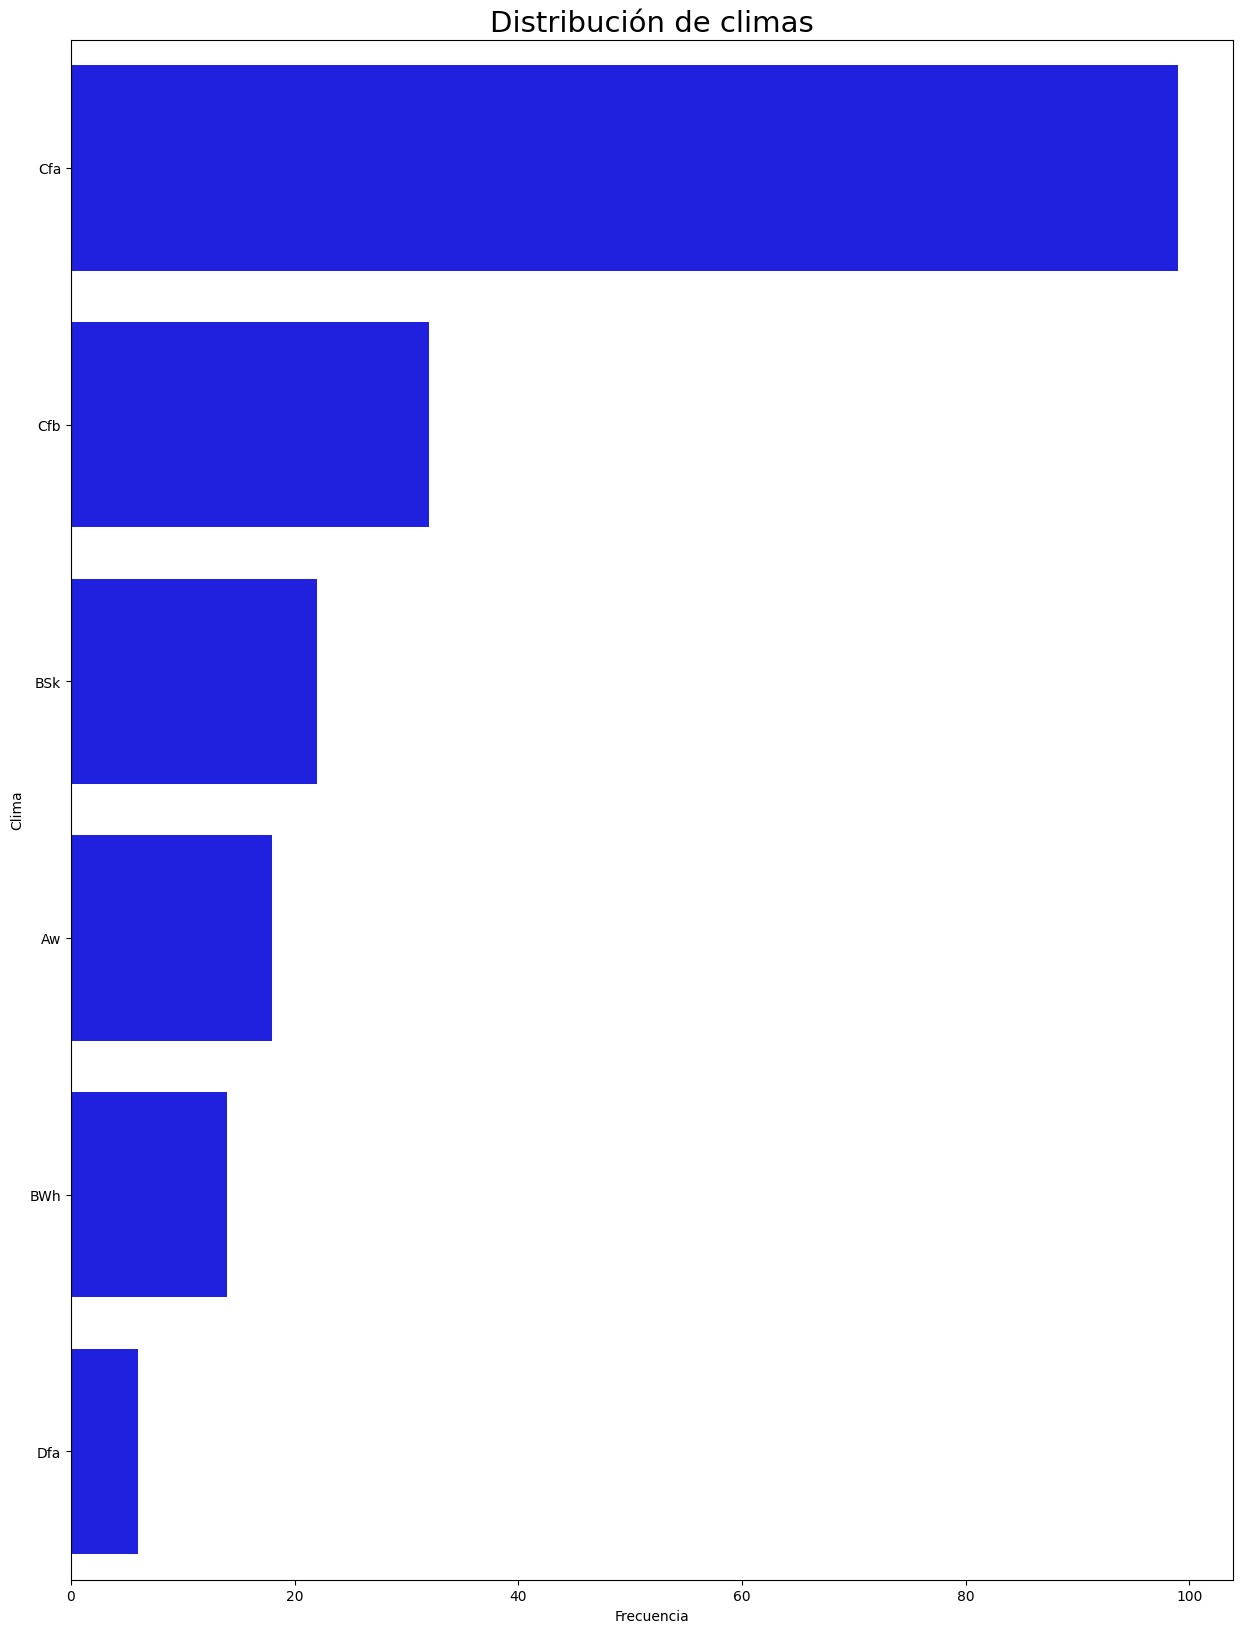

In [14]:
fig, ax = plt.subplots(1,1 ,figsize=(15, 20))
sns.countplot(data=otus_df, y="Climate", order=otus_df.Climate.value_counts().index, color="blue")
plt.xlabel("Frecuencia")
plt.ylabel("Clima")
plt.title("Distribución de climas", fontsize=21)
plt.show()

Para fines didácticos, restrinjo los datos a aquellos que tienen al menos `n_min` datos en su categoría:

In [15]:
def get_reduced_data(data,y_counts,ylab='Climate',n_min=5):
    y_val = y_counts[y_counts>n_min]
    data_val_df = data.loc[data[ylab].isin(y_val.index)]
    return data_val_df, y_val

In [16]:
y_counts = otus_df.Climate.value_counts()
y_counts

Cfa    99
Cfb    32
BSk    22
Aw     18
BWh    14
Dfa     6
Name: Climate, dtype: int64

In [19]:
n_min = 5
otus_val_df, y_val = get_reduced_data(otus_df,y_counts,'Climate',n_min)
otus_val_df.shape

(191, 16442)

In [20]:
y_val.index

Index(['Cfa', 'Cfb', 'BSk', 'Aw', 'BWh', 'Dfa'], dtype='object')

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
%matplotlib inline
#plt.style.use('seaborn') 

Creo las variables dependientes e independientes. Para las variables dependientes, uso una codificación numérica de la respuesta con `LabelEncoder`

In [22]:
y = np.array(otus_val_df[y_names]).ravel()
X = np.array(otus_val_df.drop(y_names,axis=1)).astype('float')

le = preprocessing.LabelEncoder()
le.fit(y)
#le.classes_
y_cat = le.transform(y)
#le.inverse_transform(y_cat[:5])

Creamos conjunto de datos de entrenamiento y prueba

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=0)

In [24]:
logreg = LogisticRegression(solver='sag')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.62


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



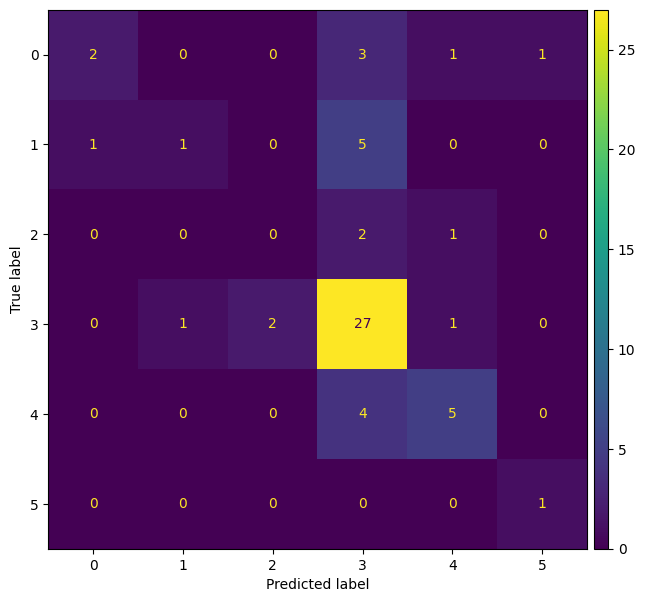

In [25]:
plt.style.use('default') 
cm = metrics.confusion_matrix(y_test,y_pred)
disp1 = metrics.ConfusionMatrixDisplay(cm, display_labels=np.arange(len(le.classes_)))
fig, ax = plt.subplots(figsize=(7,7))

disp1.plot(ax=ax, colorbar=False)
# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(disp1.im_,  cax=cax);

In [26]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.50      0.14      0.22         7
           2       0.00      0.00      0.00         3
           3       0.66      0.87      0.75        31
           4       0.62      0.56      0.59         9
           5       0.50      1.00      0.67         1

    accuracy                           0.62        58
   macro avg       0.49      0.48      0.44        58
weighted avg       0.60      0.62      0.58        58



### Representación PCA

Ahora, veamos los resultados usando una versión simplificada de los datos con PCA.

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
ncomp=3
otus_pca=PCA(ncomp)
otus_pca.fit_transform(X_train_std)
X_train_pca = otus_pca.transform(X_train_std)
proj = pd.DataFrame(X_train_pca,columns = ['pc1','pc2','pc3'])
pca_proj = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'clima': y_train})

In [28]:
# Grafica interactiva
fig = px.scatter(pca_proj, x='pc1', y='pc2', hover_data=['clima'], color = 'clima')
fig.update_layout(autosize=False,width=800,height=800,)
fig.show()

In [29]:
X_test_std = scaler.fit_transform(X_test)
X_test_pca = otus_pca.transform(X_test_std)

In [30]:
logreg2 = LogisticRegression(solver='newton-cg')
logreg2.fit(X_train_pca, y_train)

y_pred2 = logreg2.predict(X_test_pca)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(X_test_pca, y_test)))

Accuracy of logistic regression classifier on test set: 0.55


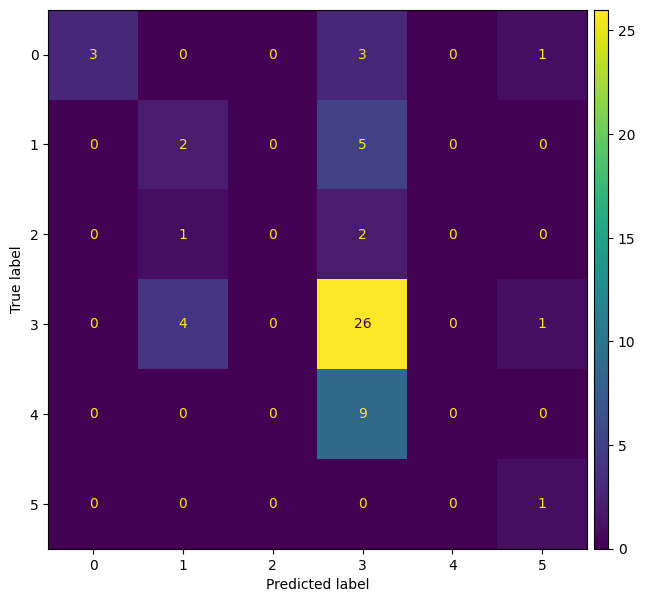

In [31]:
cm = metrics.confusion_matrix(y_test,y_pred2)
disp1 = metrics.ConfusionMatrixDisplay(cm, display_labels=np.arange(len(le.classes_)))
fig, ax = plt.subplots(figsize=(7,7))

disp1.plot(ax=ax, colorbar=False)
# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(disp1.im_,  cax=cax);

In [32]:
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.29      0.29      0.29         7
           2       0.00      0.00      0.00         3
           3       0.58      0.84      0.68        31
           4       0.00      0.00      0.00         9
           5       0.33      1.00      0.50         1

    accuracy                           0.55        58
   macro avg       0.37      0.43      0.34        58
weighted avg       0.47      0.55      0.48        58



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Notebook 3

In [33]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

otus = pd.read_csv("relative_otu2017.csv", index_col="Sample")

cont_names = list(otus.drop(["ID_city","City","Climate","Latitude", "Longitude"], axis=1).columns)
y_names = ["Climate"]
otus_df = otus[cont_names+y_names]
otus_df

,9606,5761,85009,31957,1912216,1747,33011,33010,2559073,3016342,...,1922682,1165160,2845433,2956691,2845502,1513254,2955442,40056,1922952,Climate
Sample,,,,,,,,,,,,,,,,,,,,,
CAMDA23_MetaSUB_gCSD17_BAL_10,54.900422,0.000889,0.019997,0.013078,0.129126,6.101063,0.333545,0.036821,0.033710,0.004190,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfa
CAMDA23_MetaSUB_gCSD17_BAL_11,44.046593,0.005151,0.010982,0.007386,0.115559,6.609973,0.345704,0.035377,0.035669,0.004179,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfa
CAMDA23_MetaSUB_gCSD17_BAL_12,54.243701,0.000316,0.012866,0.007804,0.080394,4.291298,0.248986,0.028579,0.023869,0.002179,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfa
CAMDA23_MetaSUB_gCSD17_BAL_14,30.948685,0.000452,0.019580,0.011748,0.088789,4.099501,0.267120,0.033512,0.037730,0.004368,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfa
CAMDA23_MetaSUB_gCSD17_BAL_1,55.396966,0.000888,0.011741,0.009401,0.157997,7.604532,0.518535,0.060116,0.055073,0.006173,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAMDA23_MetaSUB_gCSD17_ZRH_5,12.068412,0.000403,0.074334,0.063998,0.005804,0.168872,0.012166,0.016263,0.003135,0.004966,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
CAMDA23_MetaSUB_gCSD17_ZRH_6,10.081277,0.000654,0.088514,0.049163,0.092266,4.922517,0.066446,0.025132,0.013427,0.004717,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb
CAMDA23_MetaSUB_gCSD17_ZRH_7,13.673297,0.000366,0.033868,0.021360,0.064518,3.443872,0.068760,0.022237,0.011704,0.002926,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cfb


In [34]:
def get_reduced_data(data,y_counts,ylab='Climate',n_min=5):
    y_val = y_counts[y_counts>n_min]
    data_val_df = data.loc[data[ylab].isin(y_val.index)]
    return data_val_df, y_val

In [35]:
y_counts = otus_df.Climate.value_counts()
#y_counts

In [37]:
n_min = 5
otus_val_df, y_val = get_reduced_data(otus_df,y_counts,'Climate',n_min)
otus_val_df.shape

(191, 16442)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline
#plt.style.use('seaborn') 

yy = np.array(otus_val_df[y_names]).ravel()
X_numpy = np.array(otus_val_df.drop(y_names,axis=1)).astype('float')

scaler = StandardScaler()
X_numpy = scaler.fit_transform(X_numpy)

le = preprocessing.LabelEncoder()
le.fit(yy)
#le.classes_
y_numpy = le.transform(yy)
#le.inverse_transform(y_cat[:5])

In [39]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [40]:
# Turn data into tensors
X = torch.from_numpy(X_numpy).type(torch.float)
y = torch.from_numpy(y_numpy).type(torch.LongTensor)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [41]:
class nnet_otus(nn.Module):
    def __init__(self, input_features, output_features):
        super(nnet_otus, self).__init__()
        self.seq = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=520), 
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(in_features=520, out_features=520), 
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(in_features=520, out_features=300), 
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(in_features=300, out_features=100), 
            nn.ReLU(),
            nn.Linear(in_features=100, out_features=output_features), 
        )

    def forward(self, x):
        return self.seq(x)


In [42]:
# Set the hyperparameters for data creation
NUM_CLASSES = len(le.classes_)
NUM_FEATURES = X_train.shape[1]

# Create an instance of the model and send it to target device
model = nnet_otus(NUM_FEATURES, NUM_CLASSES).to(device)

# Setup loss and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1) 

# Fit the model
torch.manual_seed(42)
epochs = 100

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model(X_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train) 
    acc = accuracy_score(y_train.detach().cpu().numpy(), y_pred.detach().cpu().numpy()) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model(X_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_score(y_test.detach().cpu().numpy(), test_pred.detach().cpu().numpy())

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.79151, Accuracy: 0.11% | Test loss: 1.76532, Test acc: 0.14%
Epoch: 10 | Loss: 1.36066, Accuracy: 0.53% | Test loss: 1.44190, Test acc: 0.48%
Epoch: 20 | Loss: 0.91078, Accuracy: 0.53% | Test loss: 1.26719, Test acc: 0.48%
Epoch: 30 | Loss: 0.73169, Accuracy: 0.69% | Test loss: 1.20646, Test acc: 0.50%
Epoch: 40 | Loss: 0.52691, Accuracy: 0.75% | Test loss: 1.11992, Test acc: 0.60%
Epoch: 50 | Loss: 0.34413, Accuracy: 0.89% | Test loss: 0.97524, Test acc: 0.74%
Epoch: 60 | Loss: 0.21672, Accuracy: 0.89% | Test loss: 0.86491, Test acc: 0.79%
Epoch: 70 | Loss: 0.12571, Accuracy: 0.98% | Test loss: 0.74928, Test acc: 0.84%
Epoch: 80 | Loss: 0.05651, Accuracy: 1.00% | Test loss: 0.73225, Test acc: 0.84%
Epoch: 90 | Loss: 0.02114, Accuracy: 1.00% | Test loss: 0.68902, Test acc: 0.86%


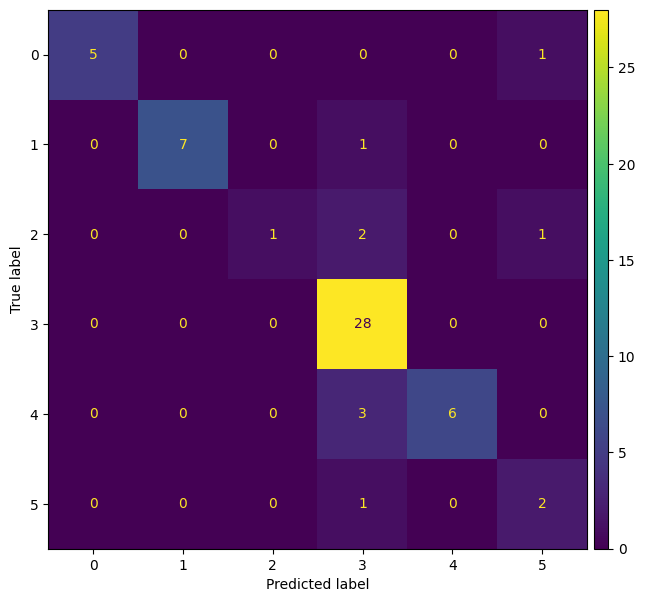

In [43]:
model.eval()
with torch.no_grad():
  test_logits = model(X_test)
  y_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

plt.style.use('default') 
cm = metrics.confusion_matrix(y_test.detach().cpu().numpy(), y_pred.detach().cpu().numpy())
disp1 = metrics.ConfusionMatrixDisplay(cm, display_labels=np.arange(len(le.classes_)))
fig, ax = plt.subplots(figsize=(7,7))

disp1.plot(ax=ax, colorbar=False)
# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(disp1.im_,  cax=cax);

In [44]:
print(metrics.classification_report(y_test.detach().cpu().numpy(), y_pred.detach().cpu().numpy()))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      0.88      0.93         8
           2       1.00      0.25      0.40         4
           3       0.80      1.00      0.89        28
           4       1.00      0.67      0.80         9
           5       0.50      0.67      0.57         3

    accuracy                           0.84        58
   macro avg       0.88      0.72      0.75        58
weighted avg       0.88      0.84      0.83        58



# Notebook 4

# Modelos de predicción con Pytorch

In [45]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=9349ec5ab293d94b01b2dbad0a2d42c98a35ad7cc286d44b5a020df93f7edbb8
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot